In [1]:
library(cmdstanr)

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: /home/dulunche/.cmdstan/cmdstan-2.30.1

- CmdStan version: 2.30.1



In [2]:
install_cmdstan()

The C++ toolchain required for CmdStan is setup properly!

* Latest CmdStan release is v2.30.1

* Installing CmdStan v2.30.1 in /home/dulunche/.cmdstan/cmdstan-2.30.1

* Downloading cmdstan-2.30.1.tar.gz from GitHub...

Warning message:
“An installation already exists at /home/dulunche/.cmdstan/cmdstan-2.30.1. Please remove or rename the installation folder or set overwrite=TRUE.”


In [3]:
model = cmdstan_model("goat_cmd.stan")

In [4]:
df = readRDS("goat.rds")

In [5]:
str(df)

'data.frame':	150 obs. of  4 variables:
 $ death : int  20 34 1 2 3 3 50 26 1 50 ...
 $ status: int  1 1 1 1 1 1 0 1 1 0 ...
 $ weight: num  5.38 7.41 9.27 6.23 5.23 ...
 $ group : chr  "A" "A" "A" "A" ...


In [6]:
library("tidyverse")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [7]:
df <- df %>% group_by(group)

In [8]:
dl <- list(
  N = nrow(df),
  G = length(unique(df$group)),
  time = df$death,
  weight = (df$weight-12)/12,
  event = df$status,
  gid = df %>% group_indices()
)

In [9]:
fit_prior = model$sample(
    data = dl,
    chains = 4,
    parallel_chains = 4
)

Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 1 Itera

See https://mc-stan.org/misc/warnings for details.




In [10]:
library(bayesplot)

This is bayesplot version 1.9.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



In [11]:
library(tidybase)

ERROR: Error in library(tidybase): there is no package called ‘tidybase’


In [12]:
a <- posterior::as_draws_rvars(fit_prior$draws())

In [13]:
a

# A draws_rvars: 1000 iterations, 4 chains, and 8 variables
$lp__: rvar<1000,4>[1] mean ± sd:
[1] -3.3 ± 2.1 

$a: rvar<1000,4>[1] mean ± sd:
[1] -0.022 ± 0.98 

$a_group: rvar<1000,4>[3] mean ± sd:
[1] 0.0095 ± 1.02  0.0059 ± 0.99  0.0026 ± 1.00 

$b_group: rvar<1000,4>[3] mean ± sd:
[1]  0.0268 ± 1.02  -0.0141 ± 1.02   0.0078 ± 0.99 

$k: rvar<1000,4>[1] mean ± sd:
[1] 4 ± 2.8 

$mu: rvar<1000,4>[150] mean ± sd:
  [1]  3.0 ± 9.5     2.8 ± 7.8     2.7 ± 6.9     2.9 ± 8.7     3.0 ± 9.7   
  [6]  2.7 ± 6.8     3.7 ± 14.8    2.9 ± 9.1     3.6 ± 14.6    4.2 ± 19.4  
 [11]  2.8 ± 8.2     3.0 ± 9.4     3.9 ± 16.8    2.9 ± 8.6     2.8 ± 7.8   
 [16]  2.7 ± 7.1     2.8 ± 7.8     3.8 ± 16.1    3.8 ± 16.4    3.0 ± 9.8   
 [21]  2.8 ± 8.0     3.1 ± 10.3    2.9 ± 8.5     2.9 ± 9.0     3.6 ± 14.5  
 [26]  2.8 ± 7.7     3.3 ± 11.6    2.7 ± 7.0     2.9 ± 8.5     3.6 ± 14.4  
 [31]  3.1 ± 10.1    2.9 ± 8.5     3.7 ± 15.5    2.8 ± 8.3     3.5 ± 13.4  
 [36]  3.1 ± 10.0    3.1 ± 10.2    3.0 ± 9.9     3

In [16]:
post_draws <- posterior::draws_of(a$pred)[1:4000,]

In [17]:
post_draws

1,0.36629600,0.32035600,0.32147100,3.60960e-01,3.56925e-01,0.22726200,0.40025000,0.35983000,0.34334500,4.11151e-01,⋯,0.1191490,0.17005300,7.49095e-02,0.1261430,0.1378540,0.08651550,0.1271200,0.165835,1.44682e-01,0.1410110
2,0.15328500,30.08620000,12.99280000,2.10500e+00,1.89803e-01,0.97033300,0.31472400,0.12487300,0.98323100,9.51927e+00,⋯,1.3482700,0.12767400,1.87957e+00,0.0423962,0.3732790,9.17706000,3.6197300,0.454305,5.80874e-02,15.3991000
3,0.34006900,0.28883800,0.25636100,3.22820e-01,3.34713e-01,0.22588300,0.34691300,0.18297500,0.41541800,3.60793e-01,⋯,0.1314310,0.14668400,8.71124e-02,0.1190030,0.1064270,0.13779800,0.1000270,0.141129,1.39910e-01,0.1886360
4,1.39000000,0.96247100,1.63194000,1.36572e+00,1.36228e+00,1.63308000,2.11710000,1.63184000,1.13027000,1.32276e+00,⋯,3.6777400,3.30177000,2.49368e+00,3.1400700,1.7334000,2.66997000,2.4107300,3.006680,1.25171e+00,2.2657800
5,2.98456000,2.07429000,2.25722000,3.13952e+00,2.91823e+00,2.15126000,2.00166000,2.32762000,3.63098000,4.03717e+00,⋯,0.1306350,0.08252660,5.64126e-01,0.2389670,0.4804310,0.45783700,0.2255850,0.342022,4.29637e-01,0.3567880
6,0.19226300,0.15610400,0.11005600,1.75116e-01,1.71135e-01,0.14561400,0.17909300,0.15131100,0.23517800,1.92875e-01,⋯,0.9259750,1.49705000,1.07655e+00,1.3024700,0.6612760,1.46767000,0.9679520,1.353980,1.35424e+00,0.8419360
7,0.16747500,0.09853340,0.04008030,3.29839e-01,6.42644e-02,0.25559700,0.15948100,0.07891870,0.30552000,2.85114e-01,⋯,0.2469580,0.97840400,1.05786e-01,0.9994720,1.0705500,1.14918000,1.2990400,0.308944,6.54926e-01,2.1406800
8,3.65739000,4.91052000,4.28169000,4.67410e+00,4.13747e+00,6.80848000,3.75598000,4.28570000,2.52935000,3.35689e+00,⋯,1.8660600,1.10601000,1.42998e+00,2.0936800,1.8374700,1.77327000,1.0125400,1.614590,1.91275e+00,2.2079100
9,0.86743700,1.53308000,1.05564000,1.28882e+00,4.89657e-01,0.87900000,0.52284100,1.00150000,0.85412800,1.18050e+00,⋯,0.6879110,0.85536200,9.86906e-01,1.0916500,0.4470510,1.44719000,1.5025100,0.323291,1.47856e+00,1.7211300
10,1.57821000,2.45967000,0.88369500,2.37624e+00,3.52726e+00,1.31940000,3.87702000,3.42062000,4.04848000,3.64190e+00,⋯,0.1048510,0.28724600,1.68938e-01,0.1741080,0.1509510,0.16482600,0.1707520,0.108523,1.78860e-01,0.1309900
11,0.90746900,0.86945100,1.30502000,1.17898e+00,9.97727e-01,0.96287300,0.41493400,0.90438000,0.79453500,1.24880e+00,⋯,2.0813600,3.95326000,3.54659e+00,3.1074900,4.0696700,3.05116000,2.9562400,2.289290,3.21602e+00,2.1492800


In [46]:
N = 1000

In [47]:
dat <- data.frame(id=as.numeric(), pred=as.numeric())

In [50]:
dat

id,x,y
<int>,<int>,<dbl>
1,1,0.140000000
1,2,0.073333333
1,3,0.053333333
1,4,0.046666667
1,5,0.040000000
1,6,0.026666667
1,7,0.026666667
1,8,0.026666667
1,9,0.026666667


In [27]:
library(tidybayes)
library(mltools)


Attaching package: ‘mltools’


The following object is masked from ‘package:tidyr’:

    replace_na




In [49]:
for (i in 1:N){
    obj <- empirical_cdf(post_draws[i,], ubounds=1:160)
    obj <- 1-obj$CDF
    obj <- data.frame(id=rep(i, 160), x=seq(1,160), y=obj)
    dat <- rbind(dat, obj)
}

Warning message:
“Removed 1 rows containing missing values (stat_slabinterval).”


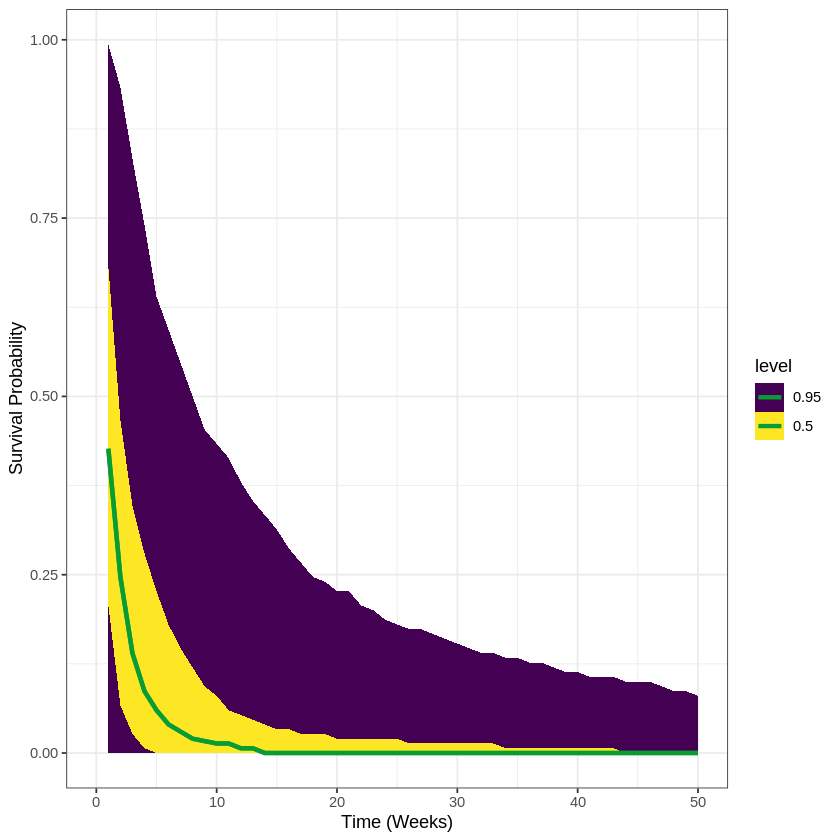

In [60]:
dat %>%
    ggplot(aes(x=x, y=y)) +
    stat_lineribbon(aes(y=y), .width=c(.95, .5), color= "#089c34") +
    theme_bw() + labs(x="Time (Weeks)", y="Survival Probability") +
    xlim(c(0,50))